# Lab02: Analysis of Coupled Noises on PCB

Due: Febuary 5, 2019

Author: Kevin Egedy

#### Objectives


//

In [2]:
# Libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
files = [
    'LineACh1Reflection_OPEN_2ns_30nsOffset',
    'LineAChA_500ps_41.750nsoff',
    'LineAChA_OPEN_500ps_41.75nsOffset',
    'LineAChB_500ps_41.952nsoff',
    'LineAChB_OPEN_500ps_41.75nsOffset',
    'LineAReflection_2ns_31.6nsoff',
    'LineBCh1Reflection_OPEN_2ns_30nsOffset',
    'LineBChA1080ps41.0184nsoff',
    'LineBChA_OPEN_500ps_41',
    'LineBChB600ps41.952nsoff',
    'LineBChB_OPEN_500ps_41.75nsOffset',
    'LineBReflection1200ps33.9808nsoff',
    'LineCCh1Reflection_OPEN_2ns_30nsOffset',
    'LineCchA_490ps_41.38ns',
    'LineCChA_OPEN_500ps_41.75nsOffset',
    'LineCchB_430ps_42nsOff',
    'LineCChB_OPEN_500ps_41.75nsOffset',
    'LineCReflection_2.4ns_30.91nsOff'
]

In [19]:
# Read .xlsx files and convert them into .csv
#
for filename in files:
    df = pd.read_excel(f'data/{filename}.xlsx',header=None,nrows=1)
    with open(f'data/csv/{filename}.csv','w+') as f0: f0.write(df.T.to_csv(index=False,header=None));

36533

35972

35655

37061

35752

36263

36477

35565

35882

36944

35788

35812

36441

35923

35661

36761

35624

36283

In [9]:
# Read .csv files into numpy arrays
#
LineACh1Reflection_OPEN_2ns_30nsOffset = \
  pd.read_csv('data/csv/LineACh1Reflection_OPEN_2ns_30nsOffset.csv',header=None).to_numpy()

LineAChA_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineAChA_500ps_41.750nsoff.csv',header=None).to_numpy()

LineAChA_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineAChA_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineAChB_500ps_41952nsOffset = \
  pd.read_csv('data/csv/LineAChB_500ps_41.952nsoff.csv',header=None).to_numpy()

LineAChB_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineAChB_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineAReflection_2ns_316nsOffset = \
  pd.read_csv('data/csv/LineAReflection_2ns_31.6nsoff.csv',header=None).to_numpy()

LineBCh1Reflection_OPEN_2ns_30nsOffset = \
  pd.read_csv('data/csv/LineBCh1Reflection_OPEN_2ns_30nsOffset.csv',header=None).to_numpy()

LineBChA1_080ps_410184nsOffset = \
  pd.read_csv('data/csv/LineBChA1080ps41.0184nsoff.csv',header=None).to_numpy()

LineBChA_OPEN_500ps_41nsOffset = \
  pd.read_csv('data/csv/LineBChA_OPEN_500ps_41.csv',header=None).to_numpy()

LineBChB_600ps_41952nsOffset = \
  pd.read_csv('data/csv/LineBChB600ps41.952nsoff.csv',header=None).to_numpy()

LineBChB_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineBChB_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineBReflection1200ps_339808nsOffset = \
  pd.read_csv('data/csv/LineBReflection1200ps33.9808nsoff.csv',header=None).to_numpy()

LineCCh1Reflection_OPEN_2ns_30nsOffset = \
  pd.read_csv('data/csv/LineCCh1Reflection_OPEN_2ns_30nsOffset.csv',header=None).to_numpy()

LineCChA_490ps_4138nsOffset = \
  pd.read_csv('data/csv/LineCchA_490ps_41.38ns.csv',header=None).to_numpy()

LineCChA_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineCChA_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineCChB_430ps_42nsOffset = \
  pd.read_csv('data/csv/LineCchB_430ps_42nsOff.csv',header=None).to_numpy()

LineCChB_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineCChB_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineCReflection_24ns_3091nsOffset = \
  pd.read_csv('data/csv/LineCReflection_2.4ns_30.91nsOff.csv',header=None).to_numpy()

In [12]:
np_arrays = [
    LineACh1Reflection_OPEN_2ns_30nsOffset,
    LineAChA_500ps_4175nsOffset,
    LineAChA_OPEN_500ps_4175nsOffset,
    LineAChB_500ps_41952nsOffset,
    LineAChB_OPEN_500ps_4175nsOffset,
    LineAReflection_2ns_316nsOffset,
    LineBCh1Reflection_OPEN_2ns_30nsOffset,
    LineBChA1_080ps_410184nsOffset,
    LineBChA_OPEN_500ps_41nsOffset,
    LineBChB_600ps_41952nsOffset,
    LineBChB_OPEN_500ps_4175nsOffset,
    LineBReflection1200ps_339808nsOffset,
    LineCCh1Reflection_OPEN_2ns_30nsOffset,
    LineCChA_490ps_4138nsOffset,
    LineCChA_OPEN_500ps_4175nsOffset,
    LineCChB_430ps_42nsOffset,
    LineCChB_OPEN_500ps_4175nsOffset,
    LineCReflection_24ns_3091nsOffset
]

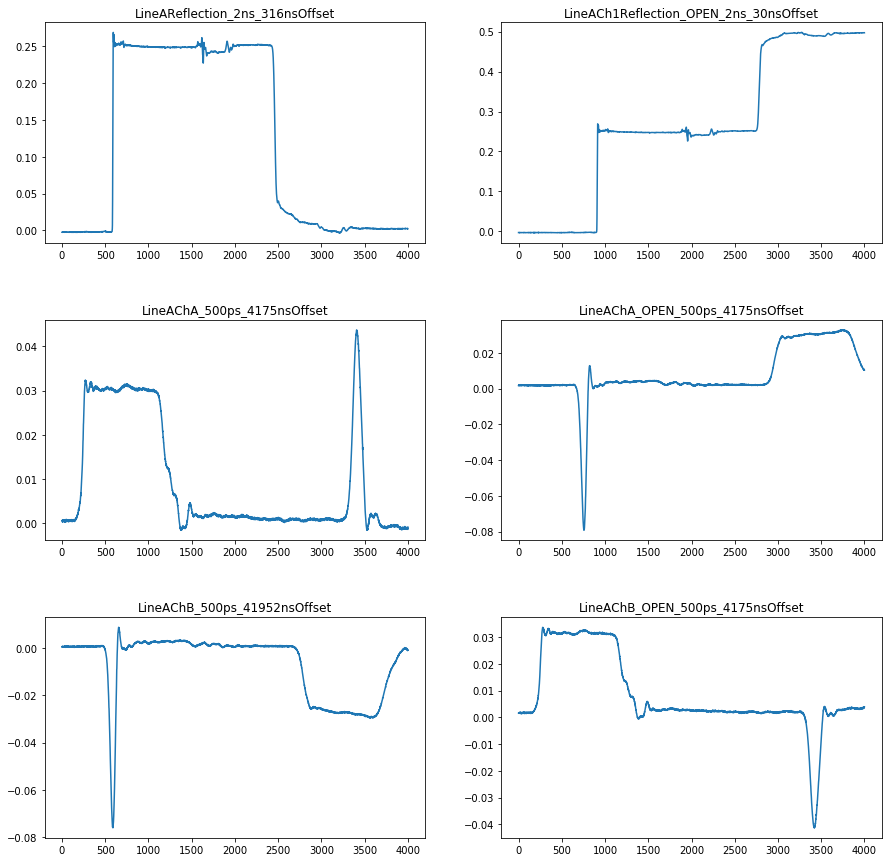

In [18]:
# Plot Overview LineA
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineAReflection_2ns_316nsOffset)
axs[0,1].plot(LineACh1Reflection_OPEN_2ns_30nsOffset)
axs[1,0].plot(LineAChA_500ps_4175nsOffset)
axs[1,1].plot(LineAChA_OPEN_500ps_4175nsOffset)
axs[2,0].plot(LineAChB_500ps_41952nsOffset)
axs[2,1].plot(LineAChB_OPEN_500ps_4175nsOffset)

axs[0,0].set_title('LineAReflection_2ns_316nsOffset')
axs[0,1].set_title('LineACh1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineAChA_500ps_4175nsOffset')
axs[1,1].set_title('LineAChA_OPEN_500ps_4175nsOffset')
axs[2,0].set_title('LineAChB_500ps_41952nsOffset')
axs[2,1].set_title('LineAChB_OPEN_500ps_4175nsOffset');

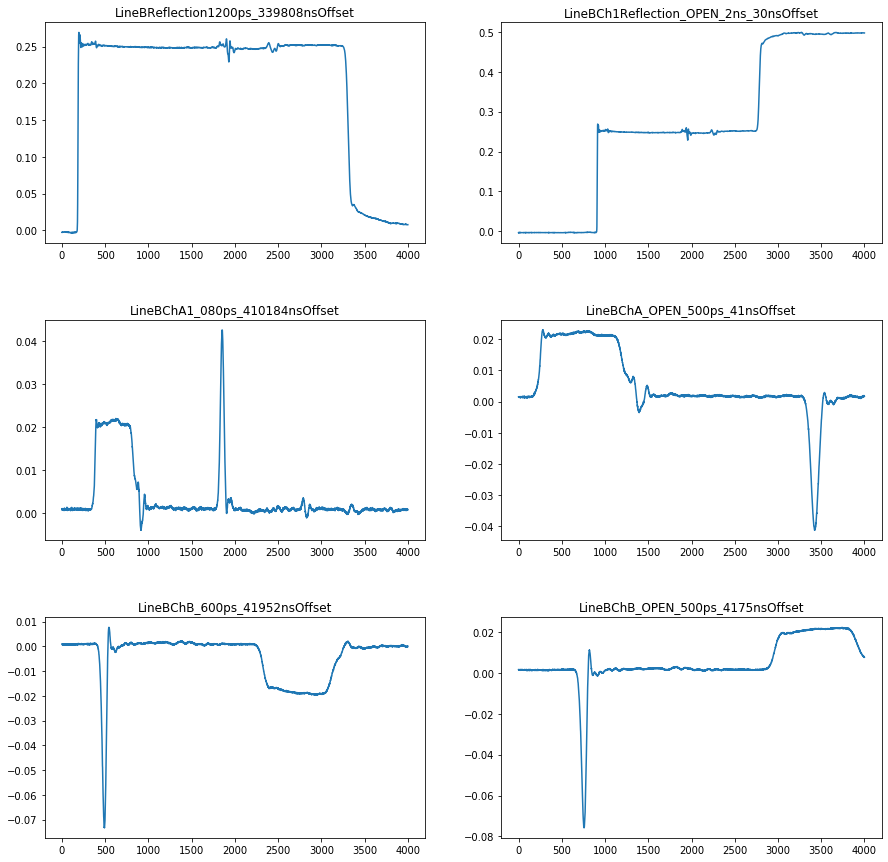

In [17]:
# Plot Overview LineB
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineBReflection1200ps_339808nsOffset)
axs[0,1].plot(LineBCh1Reflection_OPEN_2ns_30nsOffset)
axs[1,0].plot(LineBChA1_080ps_410184nsOffset)
axs[1,1].plot(LineBChA_OPEN_500ps_41nsOffset)
axs[2,0].plot(LineBChB_600ps_41952nsOffset)
axs[2,1].plot(LineBChB_OPEN_500ps_4175nsOffset)

axs[0,0].set_title('LineBReflection1200ps_339808nsOffset')
axs[0,1].set_title('LineBCh1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineBChA1_080ps_410184nsOffset')
axs[1,1].set_title('LineBChA_OPEN_500ps_41nsOffset')
axs[2,0].set_title('LineBChB_600ps_41952nsOffset')
axs[2,1].set_title('LineBChB_OPEN_500ps_4175nsOffset');

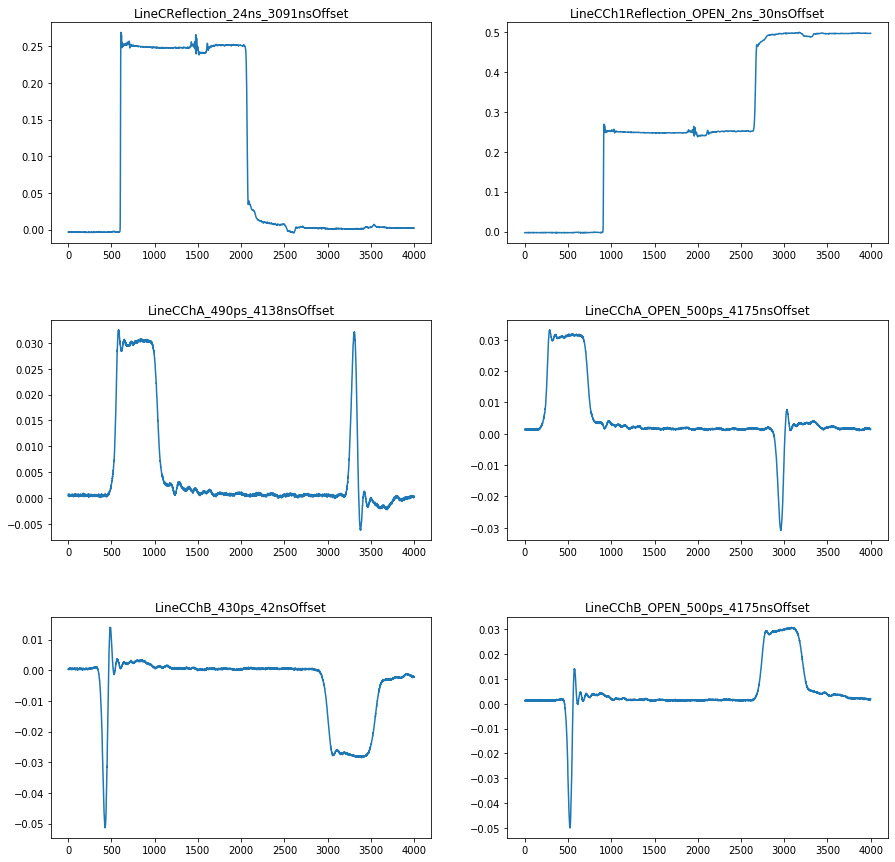

In [21]:
# Plot Overview LineC
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineCReflection_24ns_3091nsOffset)
axs[0,1].plot(LineCCh1Reflection_OPEN_2ns_30nsOffset)
axs[1,0].plot(LineCChA_490ps_4138nsOffset)
axs[1,1].plot(LineCChA_OPEN_500ps_4175nsOffset)
axs[2,0].plot(LineCChB_430ps_42nsOffset)
axs[2,1].plot(LineCChB_OPEN_500ps_4175nsOffset)

axs[0,0].set_title('LineCReflection_24ns_3091nsOffset')
axs[0,1].set_title('LineCCh1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineCChA_490ps_4138nsOffset')
axs[1,1].set_title('LineCChA_OPEN_500ps_4175nsOffset')
axs[2,0].set_title('LineCChB_430ps_42nsOffset')
axs[2,1].set_title('LineCChB_OPEN_500ps_4175nsOffset');

In [ ]:
np_arrays = [
    LineACh1Reflection_OPEN_2ns_30nsOffset,
    LineAChA_500ps_4175nsOffset,
    LineAChA_OPEN_500ps_4175nsOffset,
    LineAChB_500ps_41952nsOffset,
    LineAChB_OPEN_500ps_4175nsOffset,
    LineAReflection_2ns_316nsOffset,
    LineBCh1Reflection_OPEN_2ns_30nsOffset,
    LineBChA1_080ps_410184nsOffset,
    LineBChA_OPEN_500ps_41nsOffset,
    LineBChB_600ps_41952nsOffset,
    LineBChB_OPEN_500ps_4175nsOffset,
    LineBReflection1200ps_339808nsOffset,
    LineCCh1Reflection_OPEN_2ns_30nsOffset,
    LineCChA_490ps_4138nsOffset,
    LineCChA_OPEN_500ps_4175nsOffset,
    LineCChB_430ps_42nsOffset,
    LineCChB_OPEN_500ps_4175nsOffset,
    LineCReflection_24ns_3091nsOffset
]